<a href="https://colab.research.google.com/github/GAYARRI/CalificationsForecast/blob/main/Predicciones_Notas5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ruta_archivo = 'Set_Valores_Reducidos.csv'

try:
    df = pd.read_csv('Set_Valores_Reducidos.csv', delimiter=';', error_bad_lines=False)
except pd.errors.ParserError as e:
    print(f"Error de análisis CSV: {e}")

print(df.head())


   idcentro_cod  idnivel_cod  nota_mensual_1  nota_mensual_2  nota_mensual_3  \
0      0.999727     0.936176          0.2857          0.2500          0.2679   
1      0.999727     0.936176          0.2857          0.2500          0.2679   
2      0.005291     0.936176          0.9592          0.8571          0.9556   
3      0.004590     0.936176          0.3125          1.0000          0.0000   
4      0.000000     0.936176          0.0000          0.2226          0.4118   

   nota_mensual_4  nota_mensual_5  nota_mensual_6  total_actividades  \
0          0.0000          0.5196          0.0000               0.92   
1          0.0000          0.5196          0.0000               0.92   
2          1.0000          0.9185          0.8167               0.76   
3          0.5030          0.0000          1.0000               0.10   
4          0.9514          0.9368          0.0000               5.16   

   total_tiempo_actividades  sesiones_LV  sesiones_SD  avg_duracion_sesion_LV  \
0    

<ipython-input-79-204741d9f95a>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Set_Valores_Reducidos.csv', delimiter=';', error_bad_lines=False)


In [ ]:
pip install xgboost scikit-learn

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df_imputs = df.iloc[:, :-1].copy()


In [ ]:
X = df_imputs  # Características

y = df.iloc[:,-1]  # Variable cuantitativa sobre la que aplicamos la regresion

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True)
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

y_pred = modelo_xgb.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R2 and mse: {r2,mse}')



R2 and mse: (0.9070998161295969, 0.0014155975499615884)


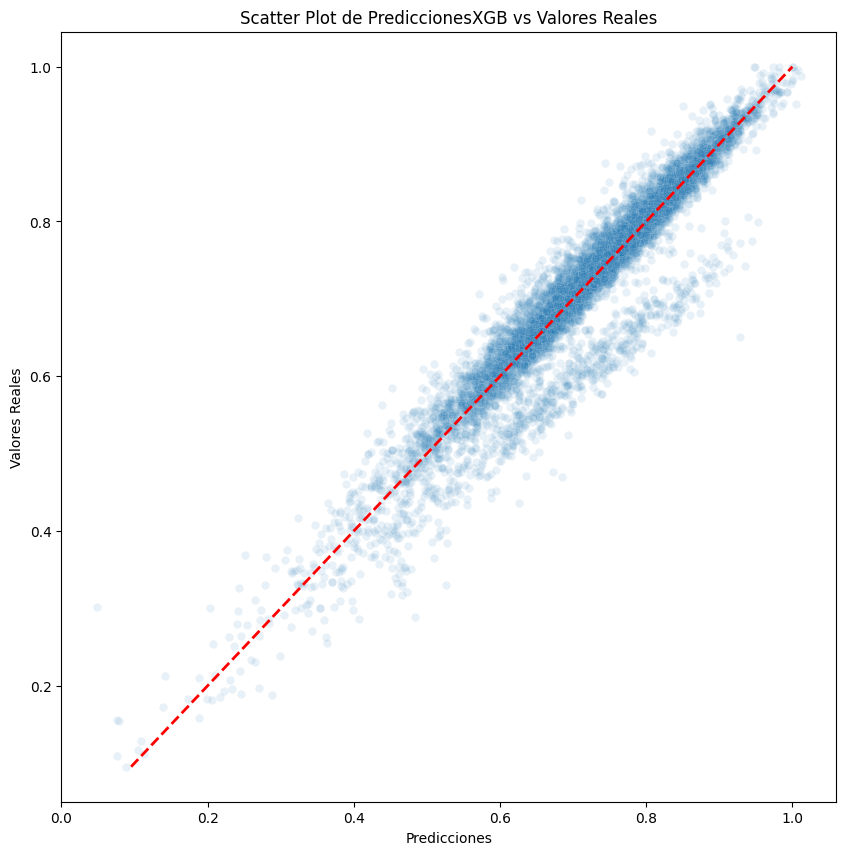

In [ ]:


df_predicciones = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred})

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_predicciones, x='Predicciones', y='Real', alpha=0.1)


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Scatter Plot de PrediccionesXGB vs Valores Reales')


plt.show()


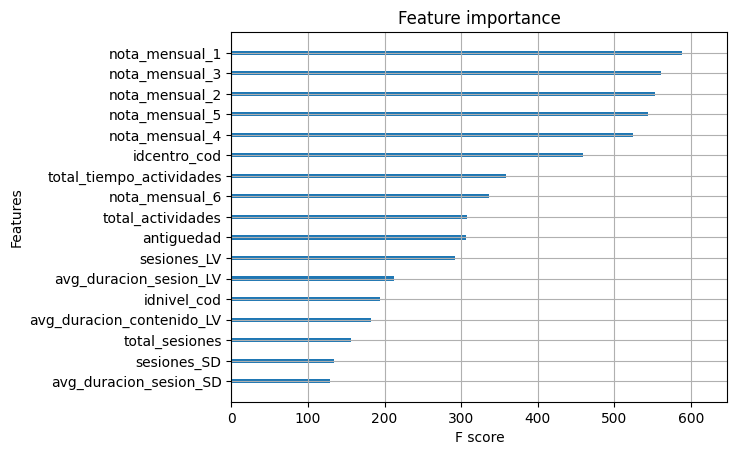

In [ ]:
#importancia de características en la regresion
xgb.plot_importance(modelo_xgb, importance_type='weight', show_values=False)
plt.show()


In [ ]:
print(mse)

0.0014155975499615884


In [ ]:
print(r2)

0.9070998161295969


In [ ]:
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.8,
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 400,
    'subsample': 0.8

}


In [ ]:
modelo_xgb_opt = xgb.XGBRegressor(**params)
modelo_xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Realizamos las predicciones en el conjunto de prueba
y_pred2 = modelo_xgb_opt.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'R2 and mse: {r2,mse}')



R2 and mse: (0.9194662994087324, 0.0012271591346404076)


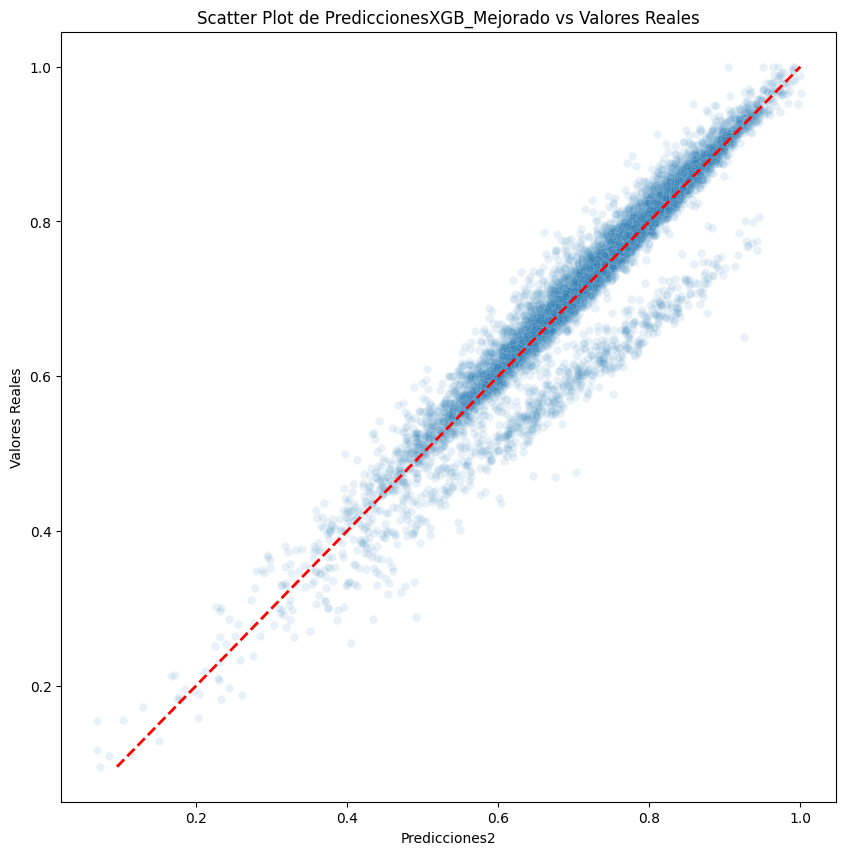

In [ ]:
# pintamos el scatter de predicciones vs valores reales en le conjunto de test

df_predicciones2 = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred2})

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_predicciones2, x='Predicciones', y='Real', alpha=0.1)


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Predicciones2')
plt.ylabel('Valores Reales')
plt.title('Scatter Plot de PrediccionesXGB_Mejorado vs Valores Reales')

# Mostrar el gráfico
plt.show()


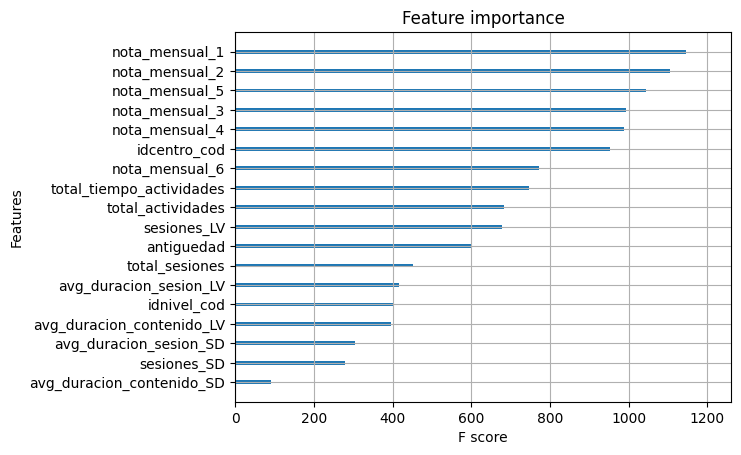

In [ ]:
#importancia de características en la regresion
xgb.plot_importance(modelo_xgb_opt, importance_type='weight', show_values=False)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Entrenar el modelo de Random Forest
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo de Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)



mse = mean_squared_error(y_test, y_pred2)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'R2 and mse: {rf_r2,rf_mse}')

R2 and mse: (0.8828560447681599, 0.001785020105561211)


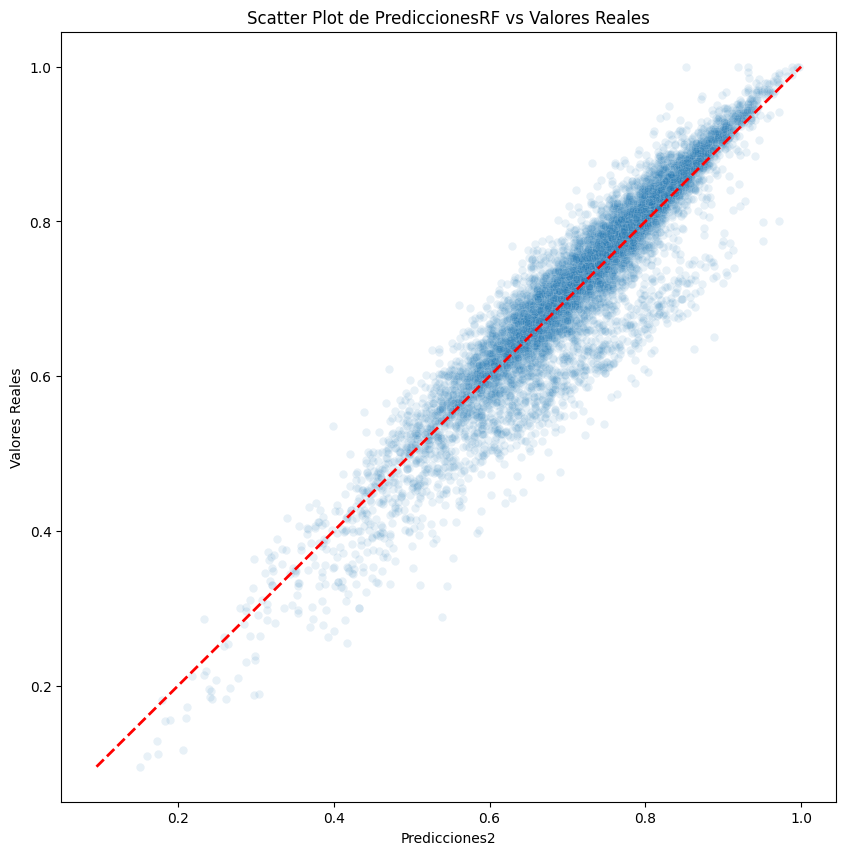

In [ ]:
# pintamos el scatter de predicciones  RANDOM FOREST vs valores reales en le conjunto de test

df_prediccionesRF = pd.DataFrame({'Real': y_test, 'Predicciones': rf_y_pred})

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_prediccionesRF, x='Predicciones', y='Real', alpha=0.1)


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Predicciones2')
plt.ylabel('Valores Reales')
plt.title('Scatter Plot de PrediccionesRF vs Valores Reales')

# Mostrar el gráfico
plt.show()

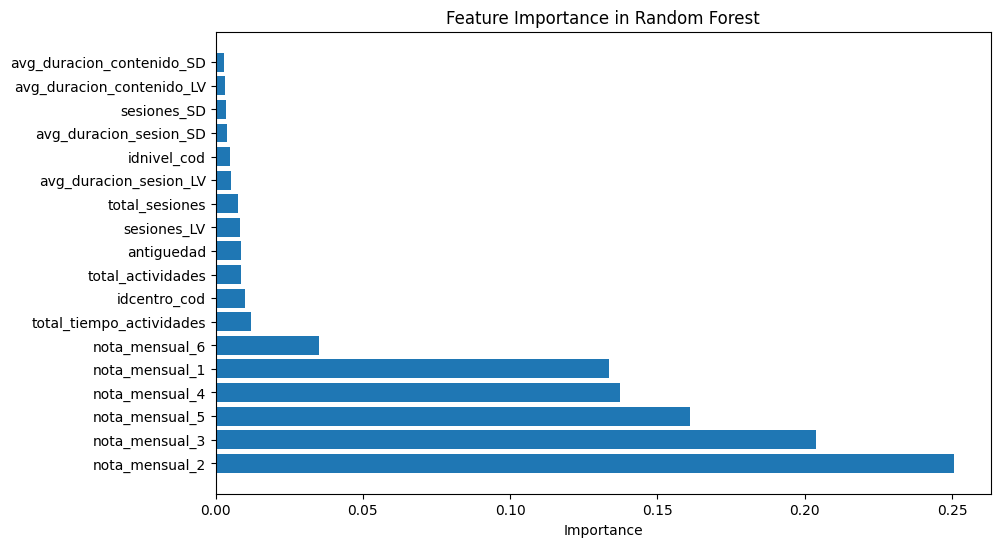

In [ ]:

import matplotlib.pyplot as plt

X = df_imputs  # Características

y = df.iloc[:,-1]

importances = rf_model.feature_importances_


feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(importances)), feature_importance_df['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

